In [1]:
import pandas as pd


In [13]:
df = pd.read_csv(r'Misc\CCD_PM10.csv')

In [14]:
df

,GRIMM,ATMOS,Purple Air,Alphasense
0,47.90,57.0,85.840,67.494
1,48.35,61.5,90.425,45.980
2,52.20,60.0,94.175,60.894
3,48.60,61.0,97.180,53.034
4,45.65,61.5,99.895,44.728
...,...,...,...,...
113,31.70,48.0,71.945,21.731
114,31.65,50.5,69.395,17.195
115,32.55,51.5,71.930,18.823
116,33.25,48.5,72.880,22.311


In [15]:
from sklearn.linear_model import LinearRegression
lr_atmos = LinearRegression().fit(df['ATMOS'].to_numpy().reshape(-1,1), df['GRIMM'])
lr_pa = LinearRegression().fit(df['Purple Air'].to_numpy().reshape(-1,1), df['GRIMM'])
lr_n3 = LinearRegression().fit(df['Alphasense'].to_numpy().reshape(-1,1), df['GRIMM'])

In [33]:
from sklearn.tree import DecisionTreeRegressor
lr_atmos = DecisionTreeRegressor().fit(df['ATMOS'].to_numpy().reshape(-1,1), df['GRIMM'])
lr_pa = DecisionTreeRegressor().fit(df['Purple Air'].to_numpy().reshape(-1,1), df['GRIMM'])
lr_n3 = DecisionTreeRegressor().fit(df['Alphasense'].to_numpy().reshape(-1,1), df['GRIMM'])

In [34]:
df['corrected_atmos'] = lr_atmos.predict(df['ATMOS'].to_numpy().reshape(-1,1))
df['corrected_pa'] = lr_pa.predict(df['Purple Air'].to_numpy().reshape(-1,1))
df['corrected_n3'] = lr_n3.predict(df['Alphasense'].to_numpy().reshape(-1,1))

C:\Users\hitan\AppData\Local\Temp\ipykernel_31772\2737163121.py:3: UserWarning: The palette list has more values (8) than needed (7), which may not be intended.
  sns.lineplot(data=df, palette=sns.color_palette("Set2"), dashes=False)


<Axes: >

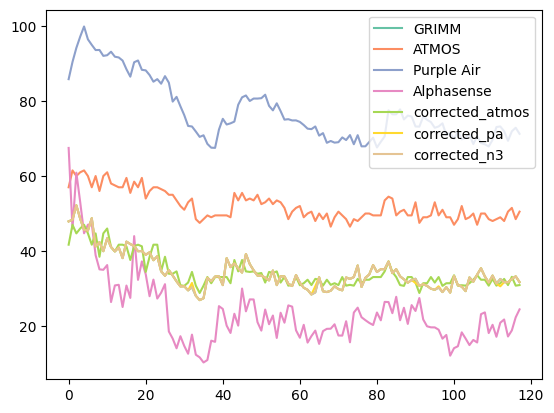

In [35]:
import seaborn as sns

sns.lineplot(data=df, palette=sns.color_palette("Set2"), dashes=False)

<Axes: >

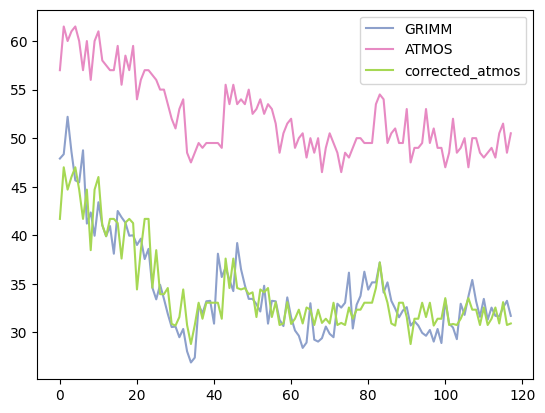

In [36]:
sns.lineplot(data=df[['GRIMM','ATMOS','corrected_atmos']], palette=sns.color_palette("Set2")[2:5], dashes=False)

Atmos is the most corrected out of the box. 

<Axes: >

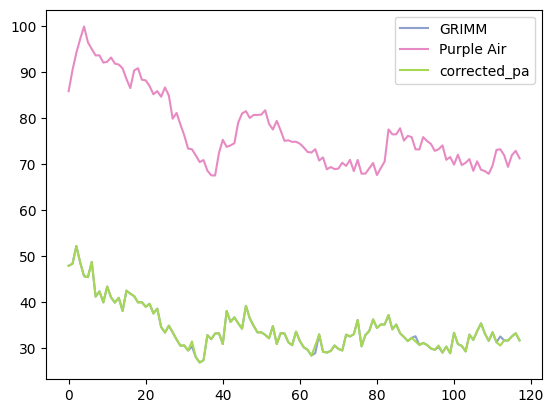

In [37]:
sns.lineplot(data=df[['GRIMM','Purple Air','corrected_pa']], palette=sns.color_palette("Set2")[2:5], dashes=False)

<Axes: >

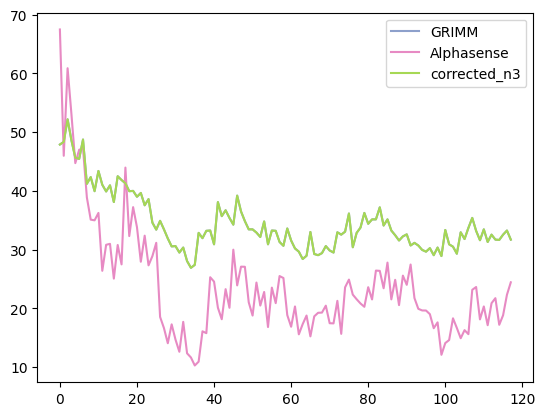

In [39]:
sns.lineplot(data=df[['GRIMM','Alphasense','corrected_n3']], palette=sns.color_palette("Set2")[2:5], dashes=False)

In [31]:
df.to_csv('LR_Data_PM_10.csv')

In [40]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error
print('BEFORE CORRECTION')
print('--------------------------------------------')
print('MAE ATMOS     : ', f"{mean_absolute_error(df['GRIMM'], df['ATMOS']) :.3f}")
print('MAE Purple Air: ', f"{mean_absolute_error(df['GRIMM'], df['Purple Air']) :.3f}")
print('MAE OPC N3    : ', f"{mean_absolute_error(df['GRIMM'], df['Alphasense']) :.3f}")
print('\n')
print('R2 ATMOS     : ', f"{r2_score(df['GRIMM'], df['ATMOS']) :.3f}")
print('R2 Purple Air: ', f"{r2_score(df['GRIMM'], df['Purple Air']) :.3f}")
print('R2 OPC N3    : ', f"{r2_score(df['GRIMM'], df['Alphasense']) :.3f}")
print('\n')
print('MAPE ATMOS     : ', f"{mean_absolute_percentage_error(df['GRIMM'], df['ATMOS']) :.3f}")
print('MAPE Purple Air: ', f"{mean_absolute_percentage_error(df['GRIMM'], df['Purple Air']) :.3f}")
print('MAPE OPC N3    : ', f"{mean_absolute_percentage_error(df['GRIMM'], df['Alphasense']) :.3f}")
print('\n')
print('AFTER CORRECTION')
print('--------------------------------------------')
print('MAE ATMOS     : ', f"{mean_absolute_error(df['GRIMM'], df['corrected_atmos']) :.3f}")
print('MAE Purple Air: ', f"{mean_absolute_error(df['GRIMM'], df['corrected_pa']) :.3f}")
print('MAE OPC N3    : ', f"{mean_absolute_error(df['GRIMM'], df['corrected_n3']) :.3f}")
print('\n')
print('R2 ATMOS     : ', f"{r2_score(df['GRIMM'], df['corrected_atmos']) :.3f}")
print('R2 Purple Air: ', f"{r2_score(df['GRIMM'], df['corrected_pa']) :.3f}")
print('R2 OPC N3    : ', f"{r2_score(df['GRIMM'], df['corrected_n3']) :.3f}")
print('\n')
print('MAPE ATMOS     : ', f"{mean_absolute_percentage_error(df['GRIMM'], df['corrected_atmos']) :.3f}")
print('MAPE Purple Air: ', f"{mean_absolute_percentage_error(df['GRIMM'], df['corrected_pa']) :.3f}")
print('MAPE OPC N3    : ', f"{mean_absolute_percentage_error(df['GRIMM'], df['corrected_n3']) :.3f}")



BEFORE CORRECTION
--------------------------------------------
MAE ATMOS     :  17.746
MAE Purple Air:  42.792
MAE OPC N3    :  11.236


R2 ATMOS     :  -11.918
R2 Purple Air:  -73.017
R2 OPC N3    :  -4.820


MAPE ATMOS     :  0.532
MAPE Purple Air:  1.261
MAPE OPC N3    :  0.338


AFTER CORRECTION
--------------------------------------------
MAE ATMOS     :  1.811
MAE Purple Air:  0.052
MAE OPC N3    :  0.000


R2 ATMOS     :  0.773
R2 Purple Air:  0.997
R2 OPC N3    :  1.000


MAPE ATMOS     :  0.052
MAPE Purple Air:  0.002
MAPE OPC N3    :  0.000
